ingrese el numero de ciclos para la funcion: 8
ingrese la cantidad de armonicos a calcular: 100


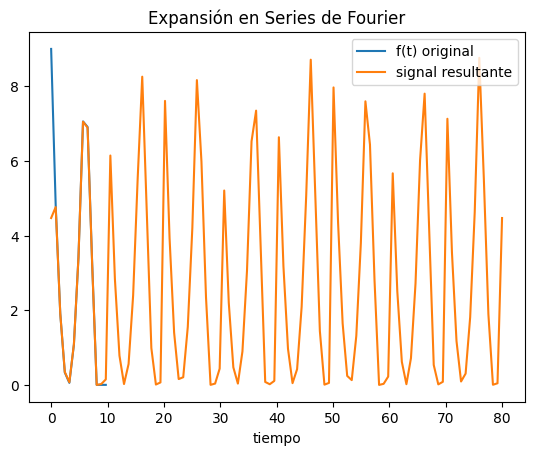

Error cuadrático medio: 0.06377047179800278


In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym

k = sym.Symbol('k')
t = sym.Symbol('t')

ciclos = input("ingrese el numero de ciclos para la funcion: ")
Armonicos = input("ingrese la cantidad de armonicos a calcular: ")
Armonicos = int(Armonicos)
ciclos = int(ciclos)


Tmin = 0
Tmax = 10
T=Tmax-Tmin


Tx=10*ciclos

w = 2*np.pi/T

f1= (t-3)**2
f2= ((-9/2)*t + 36)
f3= 0

# ft es una función simbólica por tramos
ft = sym.Piecewise((f1, ((t <= 6) & (t >= 0))), (f2, ((t > 6) & (t <= 8))), (f3, ((t <= 10) & (t > 8))),)
ft

f_integral = ft
a0 = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))


# Calculamos la integral para ak
f_integral = ft*sym.cos(k*w*t)
ak = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))


# Calculamos la integral para bk
f_integral = ft*sym.sin(k*w*t)
bk = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))


# Definimos el número de armónicos para la expansión
serie = 0


for i in range(1,Armonicos+1):

    # Evaluamos los coeficientes para cada armónico
    ak_c = ak.subs(k,i)
    bk_c = bk.subs(k,i)


    serie= serie + ak_c*sym.cos(i*w*t) # Términos coseno de la serie
    serie = serie + bk_c*sym.sin(i*w*t) # Términos seno de la serie

serie = a0/2+serie  # Expansión final de la serie

# Convertimos la expresión Sympy a una función evaluable
fserie = sym.lambdify(t,serie)
f = sym.lambdify(t,ft)

# Creamos un vector de tiempo para la gráfica
v_tiempo = np.linspace(Tmin,Tx,100)

# Evaluamos las funciones
fserieG = fserie(v_tiempo)
fG = f(v_tiempo)

plt.plot(v_tiempo,fG,label = 'f(t) original')
plt.plot(v_tiempo,fserieG,label = 'signal resultante')

plt.xlabel('tiempo')
plt.legend()
plt.title('Expansión en Series de Fourier')
plt.show()


# Definimos la función del error cuadrático medio
def calcular_error_cuadratico_medio(ft, serie, Tmin, Tmax):
    # Convertimos las expresiones Sympy a funciones evaluables
    fserie = sym.lambdify(t,serie)
    f = sym.lambdify(t,ft)

    # Creamos un vector de tiempo para la evaluación de las funciones
    v_tiempo = np.linspace(Tmin,Tmax,1000)

    # Evaluamos las funciones en el vector de tiempo
    fserieG = fserie(v_tiempo)
    fG = f(v_tiempo)

    # Calculamos el error cuadrático medio
    error = np.mean((fG - fserieG)**2)

    return error
error = calcular_error_cuadratico_medio(ft, serie, Tmin, Tmax)
print('Error cuadrático medio:', error)